In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from sklearn.decomposition import PCA

In [37]:
# Load your feature data
office_df = pd.read_csv("../features/office/extracted-features.csv")
nature_df = pd.read_csv("../features/nature/extracted-features.csv")

# Features to compare
features_to_plot = [
    'rms', 'centroid', 'flatness',
    'bandwidth', 'zcr', 'onset_density',
]

In [38]:
# Create output directory
output_dir = "../data/plots/comparing-nature-office/"
os.makedirs(output_dir, exist_ok=True)

/var/folders/r5/v2gh3wv52yqg7bsb2zzn44n40000gn/T/ipykernel_16638/2249829546.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/r5/v2gh3wv52yqg7bsb2zzn44n40000gn/T/ipykernel_16638/2249829546.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/r5/v2gh3wv52yqg7bsb2zzn44n40000gn/T/ipykernel_16638/2249829546.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/r5/v2gh3wv52yqg7bsb2zzn44n40000gn/T/ipykernel_16638/2249829546.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and w

Figure saved to: ../data/plots/comparing-nature-office/office-vs-nature-boxplots.png


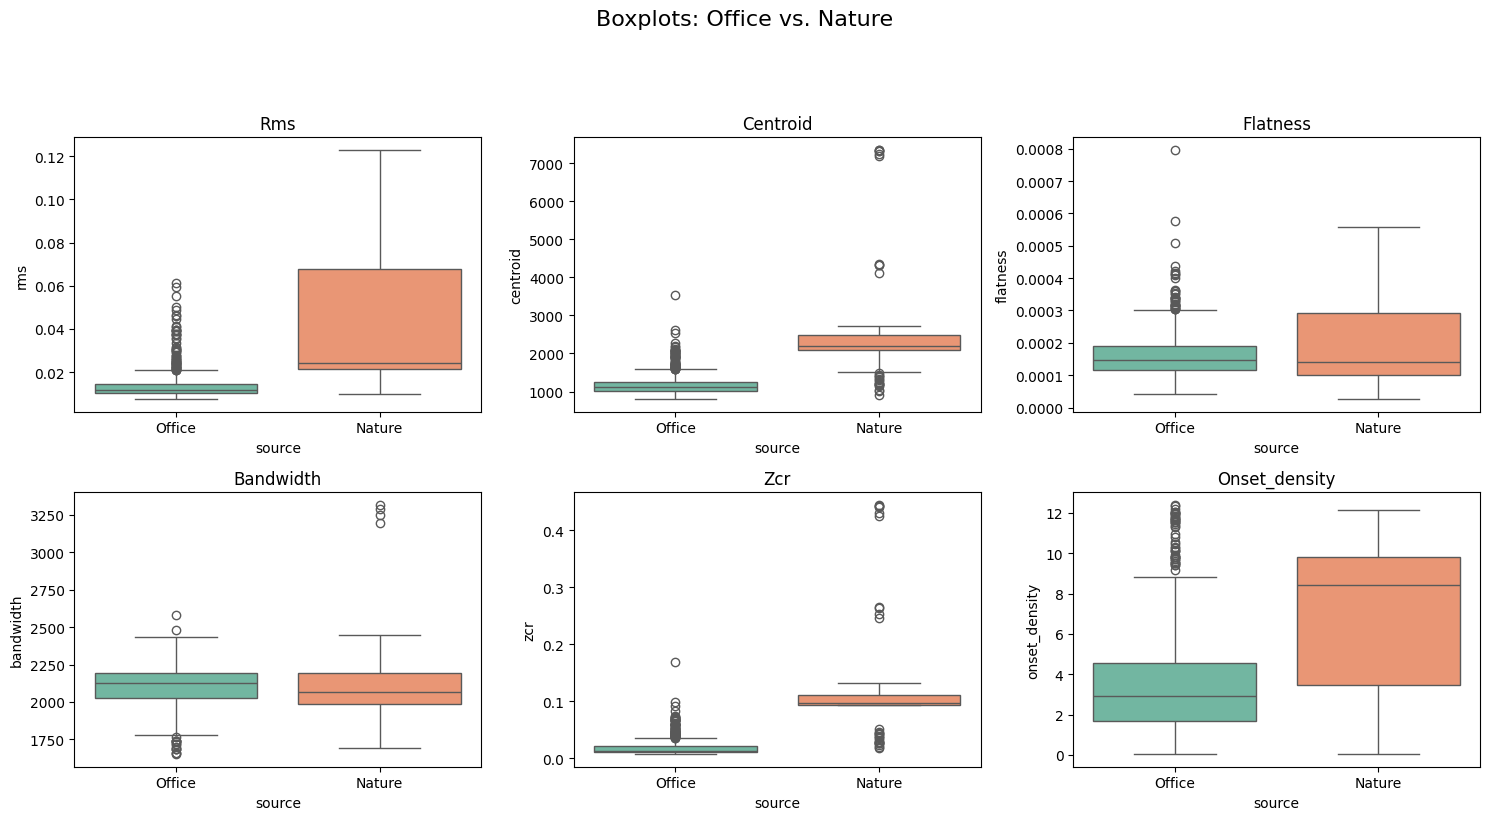

In [39]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle("Boxplots: Office vs. Nature", fontsize=16, y=1.02)

for ax, feature in zip(axes.flat, features_to_plot):
    combined_df = pd.concat([
        office_df[[feature]].assign(source="Office"),
        nature_df[[feature]].assign(source="Nature")
    ])
    sns.boxplot(
        data=combined_df,
        x='source', y=feature,
        palette="Set2",
        ax=ax
    )
    ax.set_title(feature.capitalize())

plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the figure
output_path = os.path.join(output_dir, "office-vs-nature-boxplots.png")
plt.savefig(output_path, dpi=300)
print(f"Figure saved to: {output_path}")

plt.show()


# Violin Plots for 

/var/folders/r5/v2gh3wv52yqg7bsb2zzn44n40000gn/T/ipykernel_16638/2916654478.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/r5/v2gh3wv52yqg7bsb2zzn44n40000gn/T/ipykernel_16638/2916654478.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/r5/v2gh3wv52yqg7bsb2zzn44n40000gn/T/ipykernel_16638/2916654478.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/r5/v2gh3wv52yqg7bsb2zzn44n40000gn/T/ipykernel_16638/2916654478.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is depreca

Violin plot grid saved to: ../data/plots/comparing-nature-office/office-vs-nature-violinplots.png


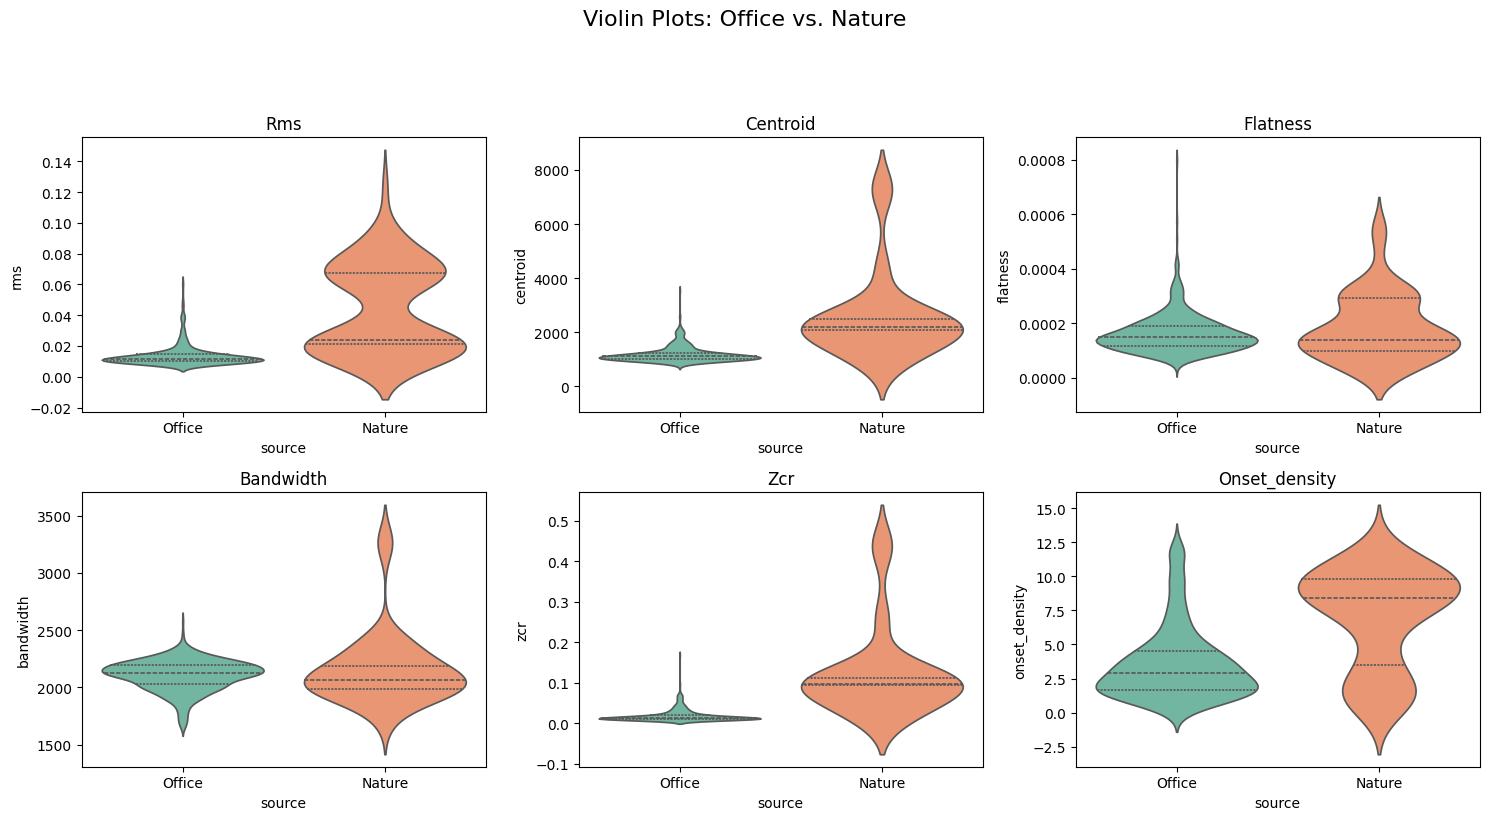

In [40]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle("Violin Plots: Office vs. Nature", fontsize=16, y=1.02)

for ax, feature in zip(axes.flat, features_to_plot):
    combined_df = pd.concat([
        office_df[[feature]].assign(source="Office"),
        nature_df[[feature]].assign(source="Nature")
    ])
    sns.violinplot(
        data=combined_df,
        x='source', y=feature,
        palette="Set2",
        inner="quartile",
        ax=ax
    )
    ax.set_title(feature.capitalize())

plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the figure
output_path = os.path.join(output_dir, "office-vs-nature-violinplots.png")
plt.savefig(output_path, dpi=300)
print(f"Violin plot grid saved to: {output_path}")

# Pairplots for Overall Features

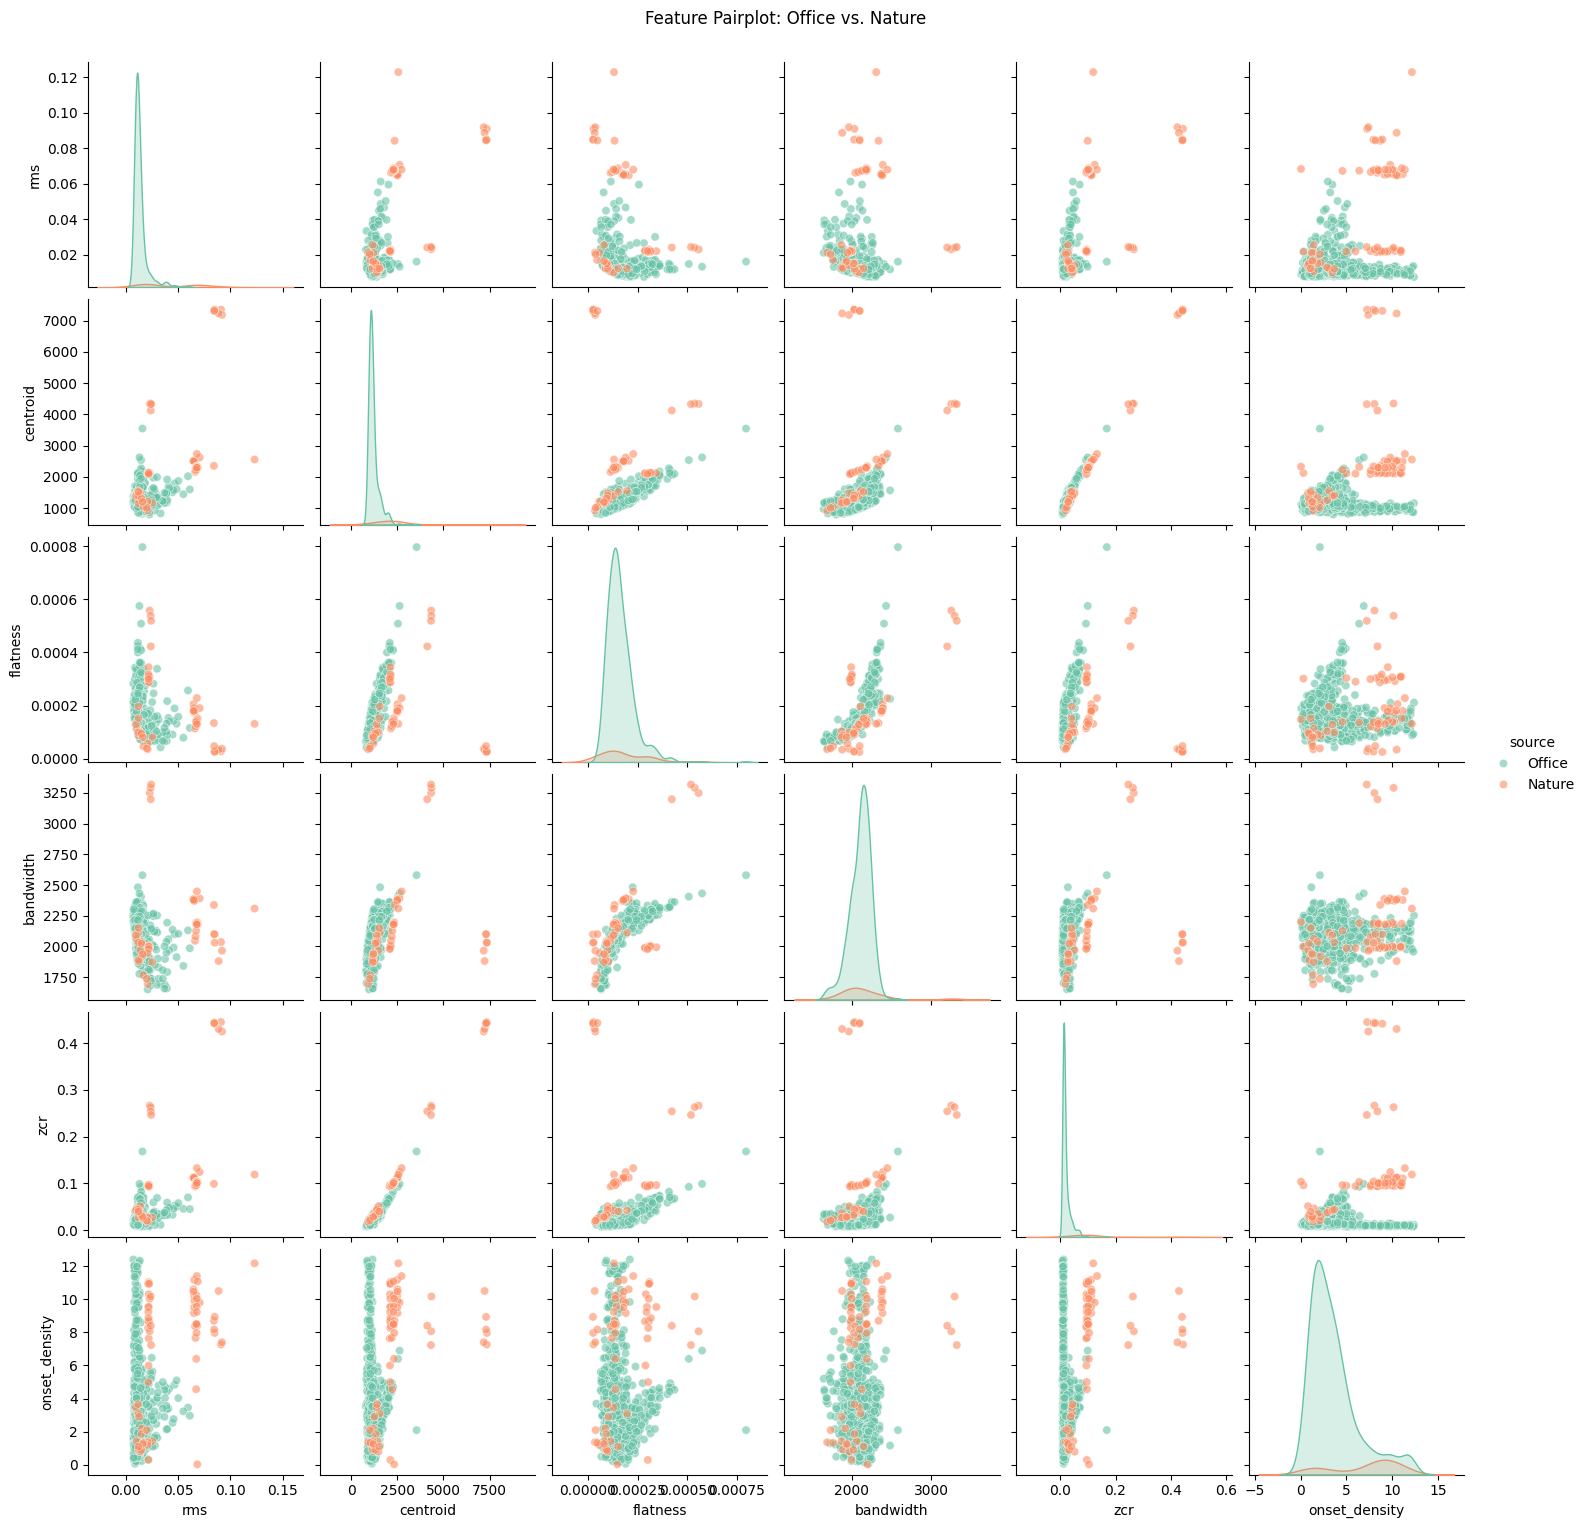

In [41]:
combined_df = pd.concat([
    office_df.assign(source="Office"),
    nature_df.assign(source="Nature")
])

sns.pairplot(
    combined_df,
    vars=features_to_plot,
    hue="source",
    palette="Set2",
    plot_kws={'alpha': 0.6}
)
plt.suptitle("Feature Pairplot: Office vs. Nature", y=1.02)

output_path = os.path.join(output_dir, "office-vs-nature-pairplots.png")
plt.savefig(output_path, dpi=300)

# PCA for Summarising Dimensionality

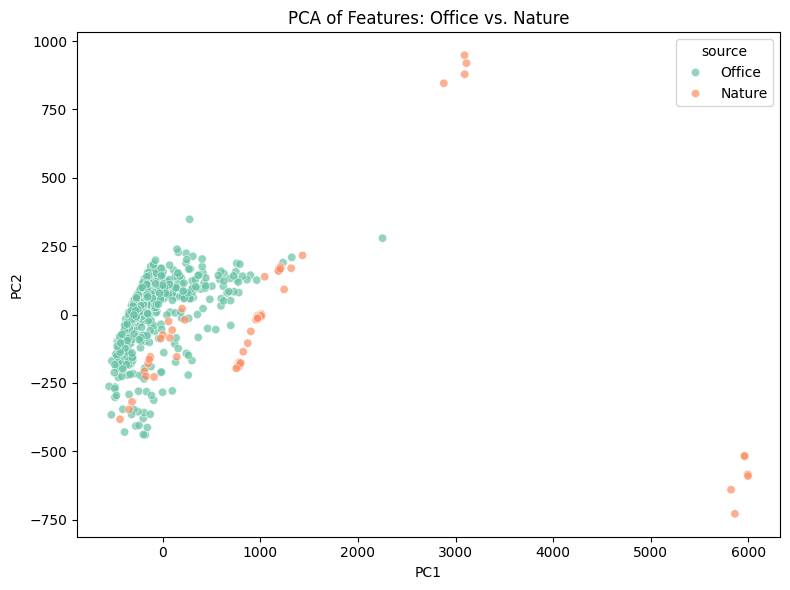

In [42]:
combined_df = pd.concat([
    office_df.assign(source="Office"),
    nature_df.assign(source="Nature")
])

X = combined_df[features_to_plot].values
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

combined_df['PC1'] = pca_result[:, 0]
combined_df['PC2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=combined_df,
    x='PC1', y='PC2',
    hue='source',
    palette='Set2',
    alpha=0.7
)
plt.title("PCA of Features: Office vs. Nature")
plt.tight_layout()

output_path = os.path.join(output_dir, "office-vs-nature-pca.png")
plt.savefig(output_path, dpi=300)

KDE plot grid saved to: ../data/plots/comparing-nature-office/office-vs-nature-kdeplots.png


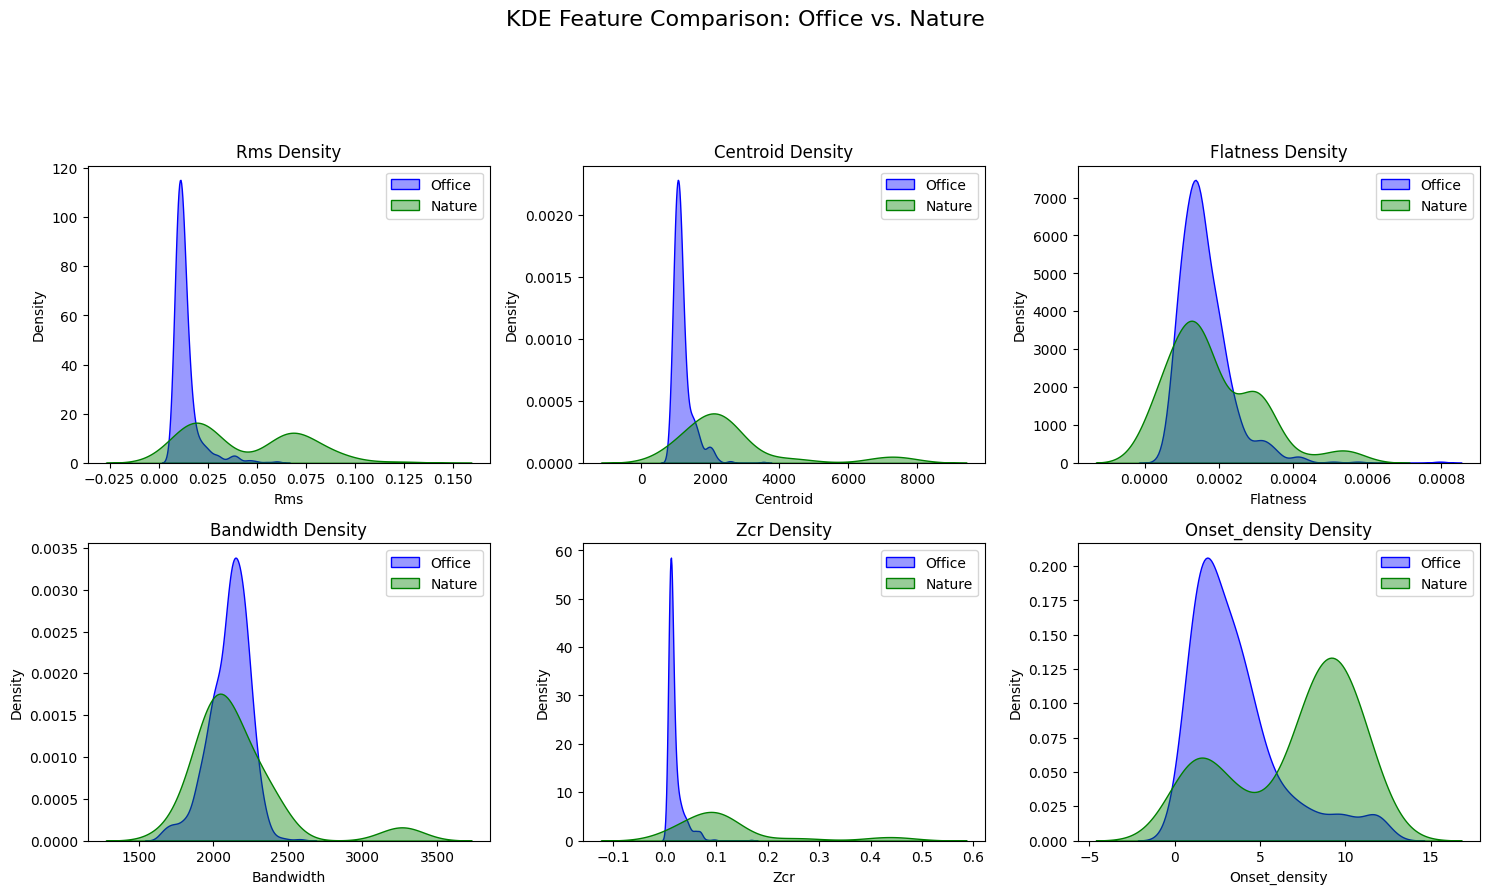

In [43]:
# 3x3 grid (we’ll hide the last 3 empty plots)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle("KDE Feature Comparison: Office vs. Nature", fontsize=16, y=1.02)

for ax, feature in zip(axes.flat, features_to_plot):
    sns.kdeplot(
        office_df[feature],
        label="Office",
        fill=True,
        alpha=0.4,
        color="blue",
        ax=ax
    )
    sns.kdeplot(
        nature_df[feature],
        label="Nature",
        fill=True,
        alpha=0.4,
        color="green",
        ax=ax
    )
    ax.set_title(f"{feature.capitalize()} Density")
    ax.set_xlabel(feature.capitalize())
    ax.set_ylabel("Density")
    ax.legend()

# Hide empty subplots
for ax in axes.flat[len(features_to_plot):]:
    ax.set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the figure
output_path = "../data/plots/comparing-nature-office/office-vs-nature-kdeplots.png"
plt.savefig(output_path, dpi=300)
print(f"KDE plot grid saved to: {output_path}")

plt.show()


Histograms saved: ../data/plots/comparing-nature-office/office-vs-nature-histograms.png


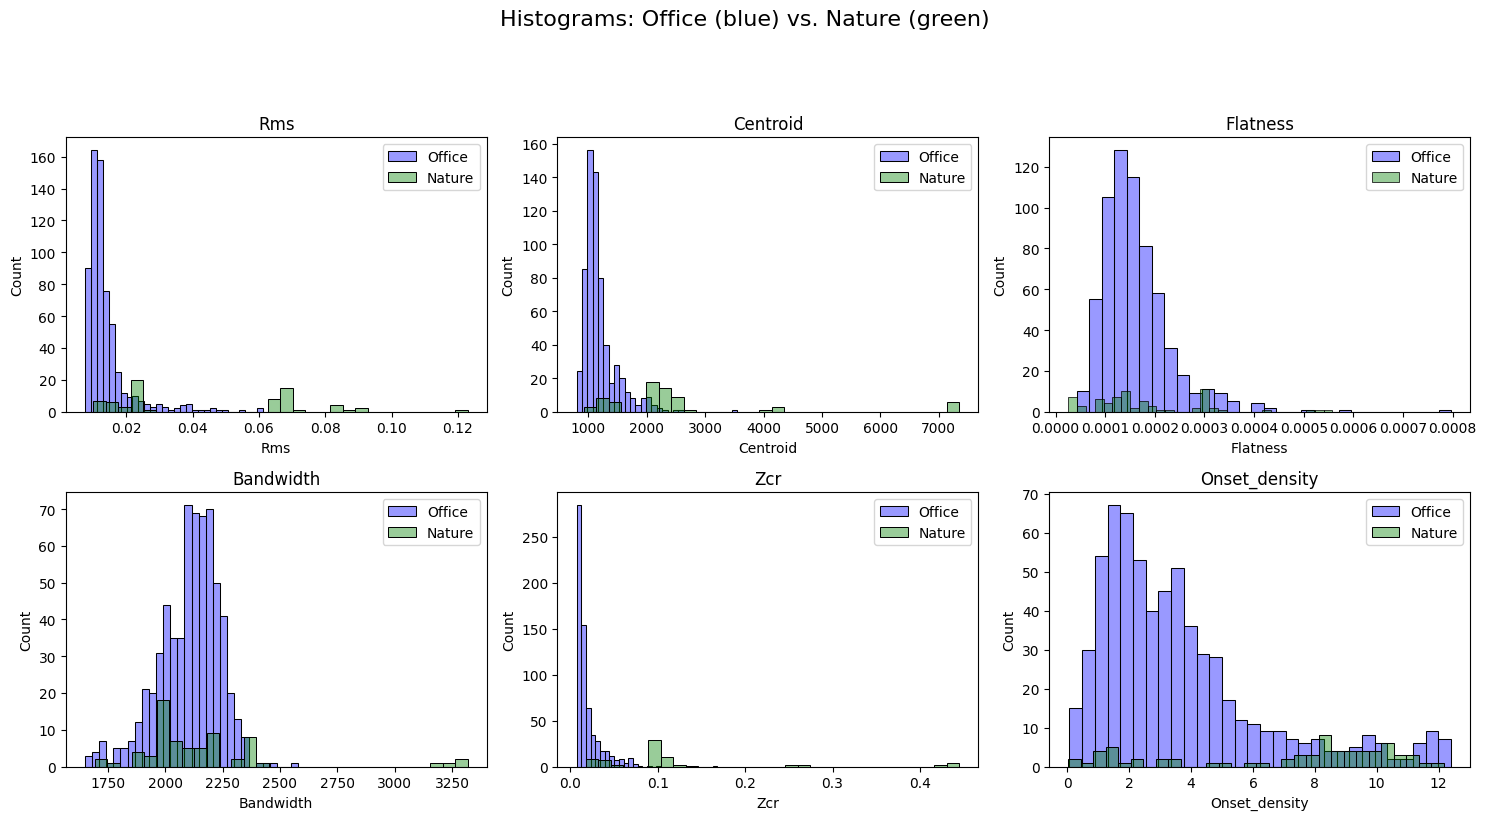

In [44]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle("Histograms: Office (blue) vs. Nature (green)", fontsize=16, y=1.02)

for ax, feature in zip(axes.flat, features_to_plot):
    sns.histplot(office_df[feature], bins=30, color="blue", alpha=0.4, label="Office", ax=ax)
    sns.histplot(nature_df[feature], bins=30, color="green", alpha=0.4, label="Nature", ax=ax)
    ax.set_title(feature.capitalize())
    ax.set_xlabel(feature.capitalize())
    ax.set_ylabel("Count")
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
output_path = "../data/plots/comparing-nature-office/office-vs-nature-histograms.png"
plt.savefig(output_path, dpi=300)
print(f"Histograms saved: {output_path}")
plt.show()


✅ Average RMS bar plot saved: ../data/plots/comparing-nature-office/average-rms-barplot.png


/var/folders/r5/v2gh3wv52yqg7bsb2zzn44n40000gn/T/ipykernel_16638/3294948803.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_rms, x='Source', y='Average RMS', palette=["blue", "green"])


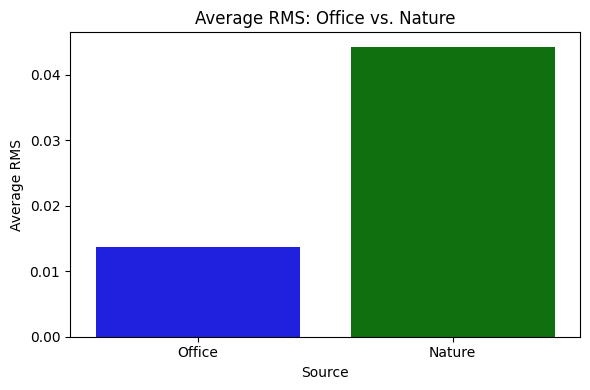

In [45]:
avg_rms = pd.DataFrame({
    'Source': ['Office', 'Nature'],
    'Average RMS': [office_df['rms'].mean(), nature_df['rms'].mean()]
})

plt.figure(figsize=(6, 4))
sns.barplot(data=avg_rms, x='Source', y='Average RMS', palette=["blue", "green"])
plt.title("Average RMS: Office vs. Nature")
plt.tight_layout()
output_path = "../data/plots/comparing-nature-office/average-rms-barplot.png"
plt.savefig(output_path, dpi=300)
print(f"✅ Average RMS bar plot saved: {output_path}")
plt.show()


✅ 2D scatter saved: ../data/plots/comparing-nature-office/centroid-vs-bandwidth.png


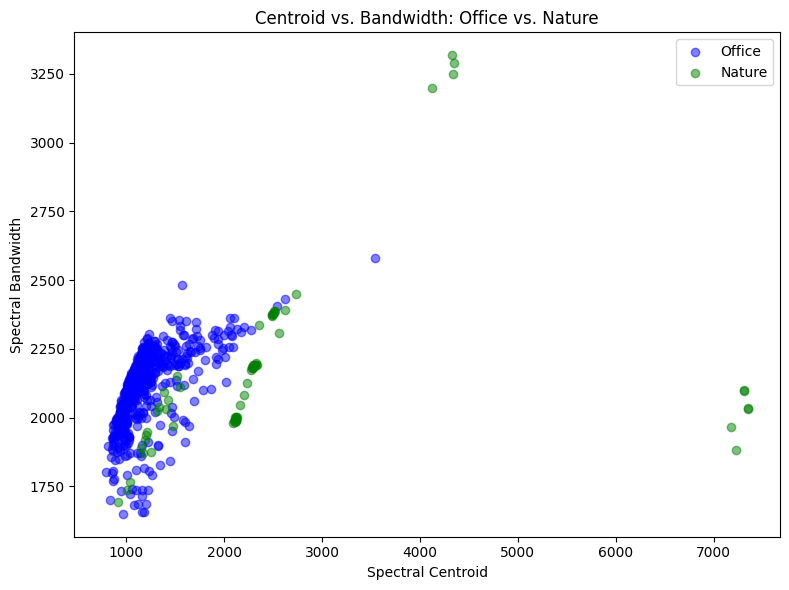

In [46]:
plt.figure(figsize=(8, 6))
plt.scatter(office_df['centroid'], office_df['bandwidth'], c='blue', alpha=0.5, label="Office")
plt.scatter(nature_df['centroid'], nature_df['bandwidth'], c='green', alpha=0.5, label="Nature")
plt.xlabel("Spectral Centroid")
plt.ylabel("Spectral Bandwidth")
plt.title("Centroid vs. Bandwidth: Office vs. Nature")
plt.legend()
plt.tight_layout()
output_path = "../data/plots/comparing-nature-office/centroid-vs-bandwidth.png"
plt.savefig(output_path, dpi=300)
print(f"✅ 2D scatter saved: {output_path}")
plt.show()


✅ 3D scatter saved: ../data/plots/comparing-nature-office/3d-feature-space.png


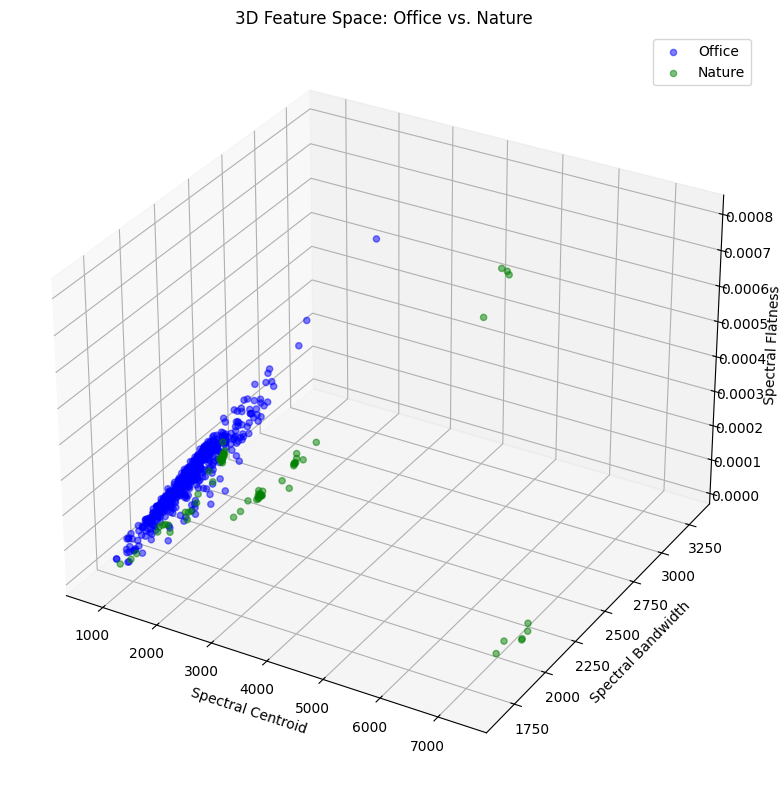

In [47]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Office data
ax.scatter(
    office_df['centroid'], office_df['bandwidth'], office_df['flatness'],
    c='blue', label="Office", alpha=0.5
)

# Nature data
ax.scatter(
    nature_df['centroid'], nature_df['bandwidth'], nature_df['flatness'],
    c='green', label="Nature", alpha=0.5
)

ax.set_xlabel("Spectral Centroid")
ax.set_ylabel("Spectral Bandwidth")
ax.set_zlabel("Spectral Flatness")
ax.set_title("3D Feature Space: Office vs. Nature")
ax.legend()

plt.tight_layout()
output_path = "../data/plots/comparing-nature-office/3d-feature-space.png"
plt.savefig(output_path, dpi=300)
print(f"✅ 3D scatter saved: {output_path}")
plt.show()



Loudest Comparison
segment_397.wav


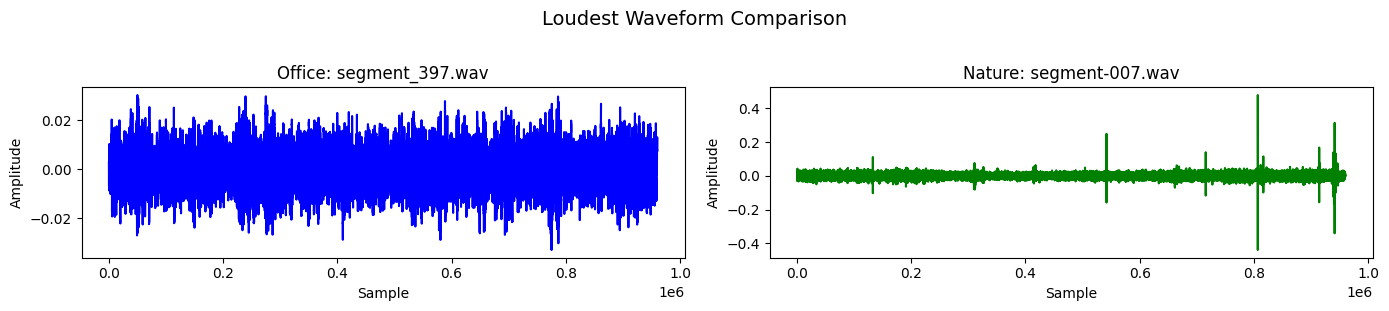


Softest Comparison
segment_206.wav


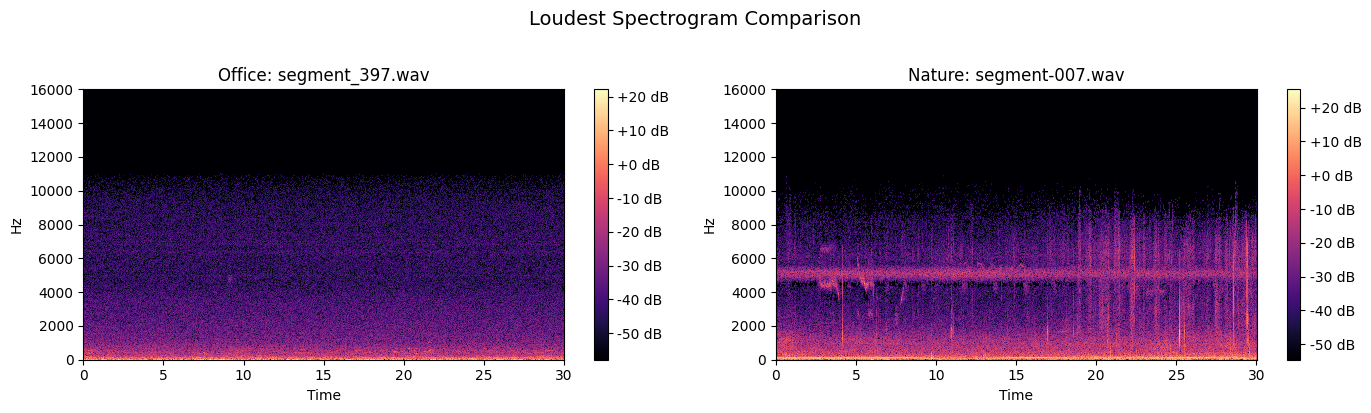

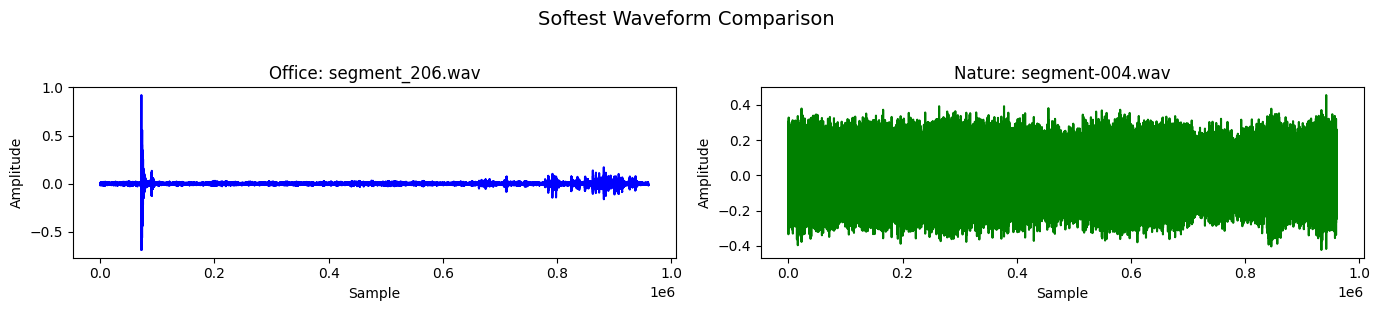


Brightest Comparison
segment_004.wav


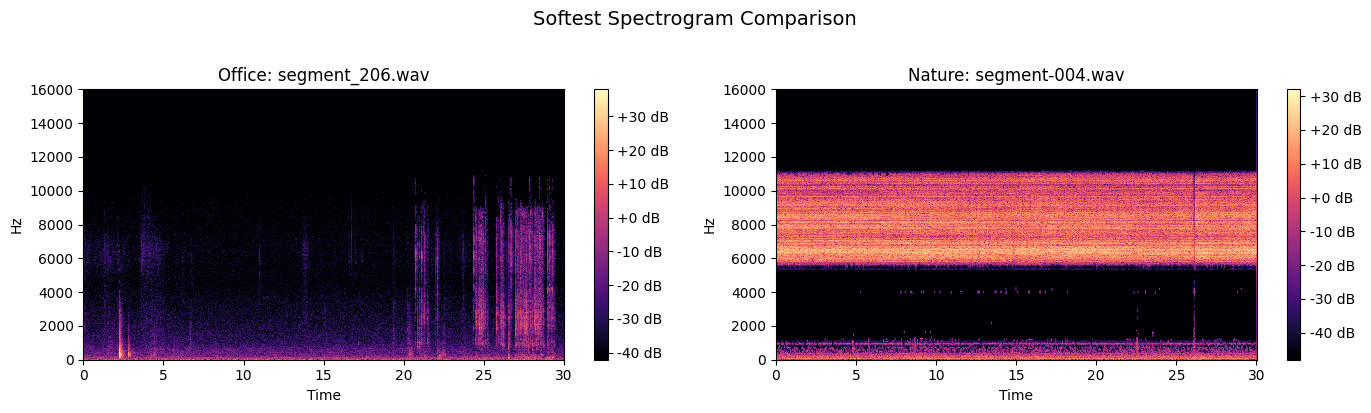

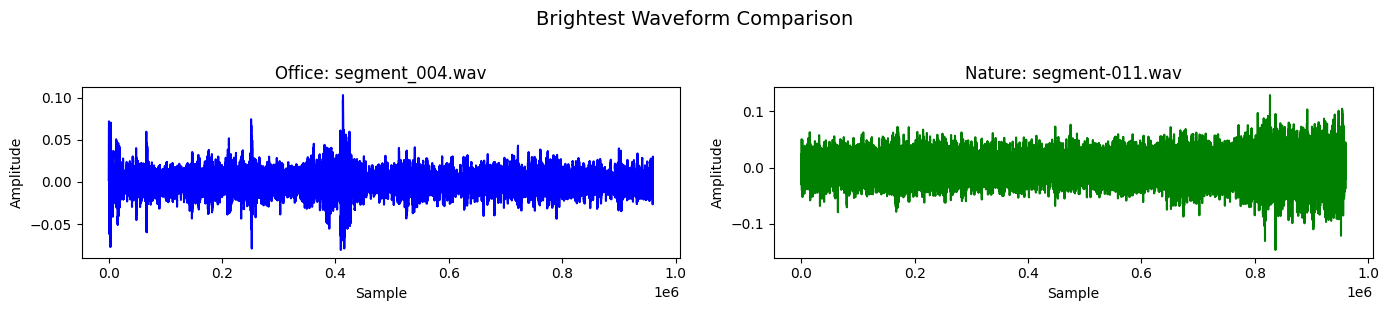


Noisiest Comparison
segment_006.wav


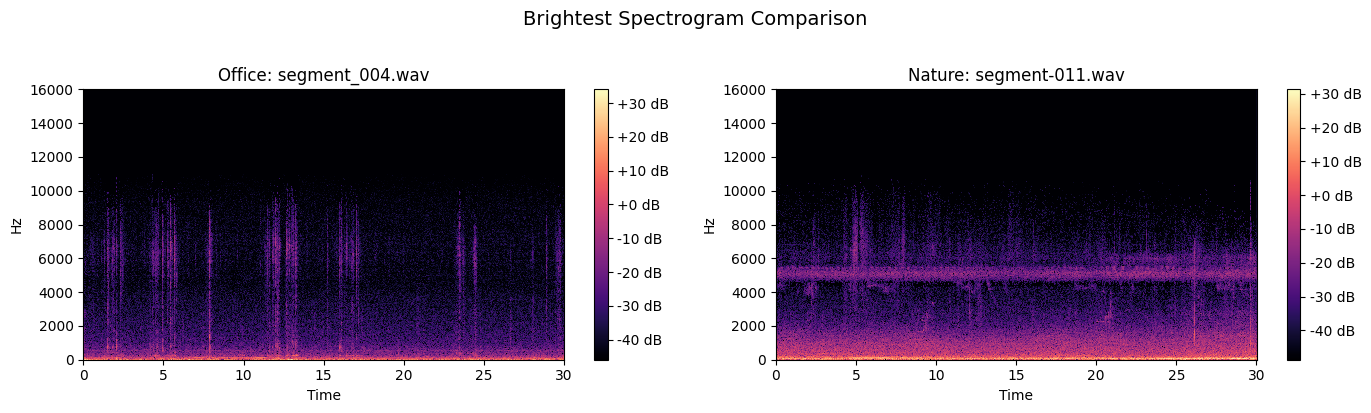

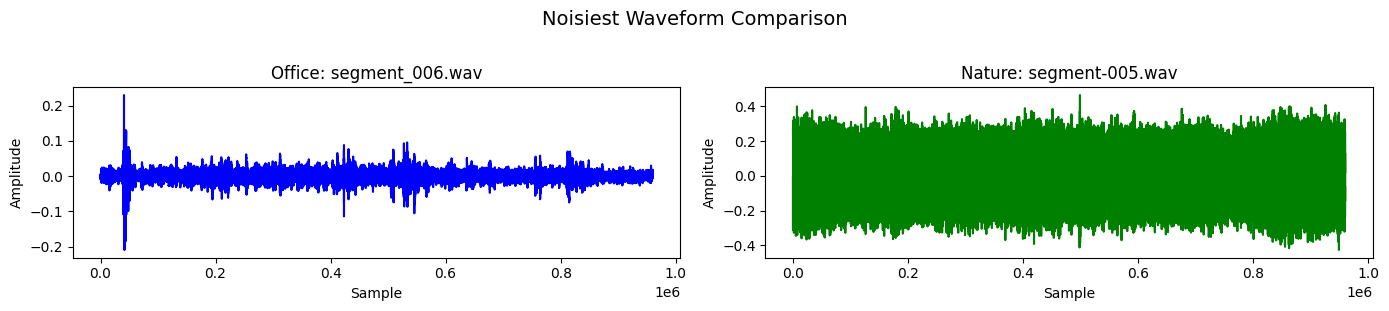

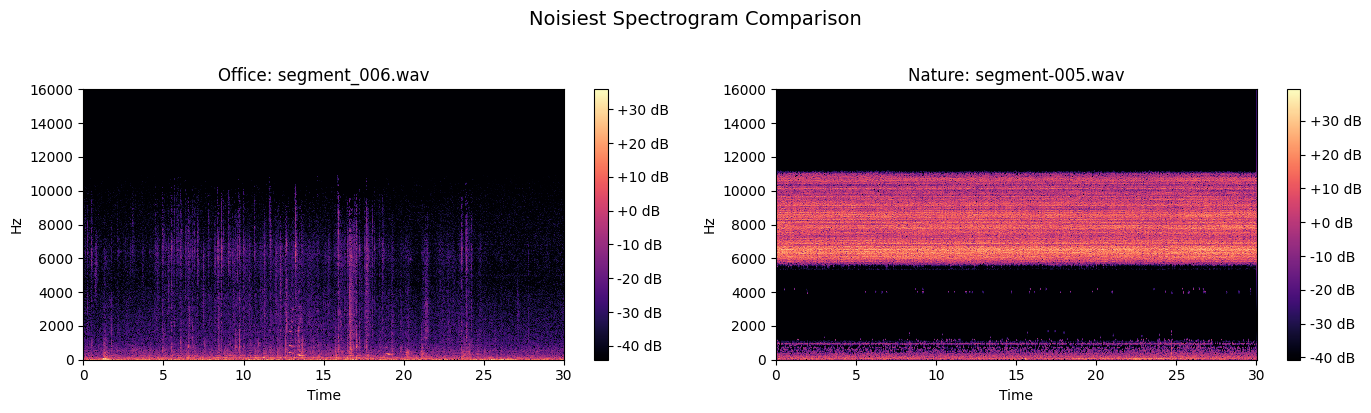

In [48]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd

# Load feature data
office_df = pd.read_csv("../features/office/extracted-features.csv")
nature_df = pd.read_csv("../features/nature/extracted-features.csv")

# Define interesting segments
# Adjust segment names and paths based on your actual files!
interesting_pairs = [
    ("Loudest", 
     ("office", "segment_397.wav"), 
     ("nature-1", "segment-007.wav")),
    ("Softest", 
     ("office", "segment_206.wav"), 
     ("nature-4", "segment-004.wav")),
    ("Brightest", 
     ("office", "segment_004.wav"), 
     ("nature-1", "segment-011.wav")),
    ("Noisiest", 
     ("office", "segment_006.wav"), 
     ("nature-4", "segment-005.wav"))
]

# Compare each pair
for label, (office_source, office_seg), (nature_source, nature_seg) in interesting_pairs:
    print(f"\n{label} Comparison")
    print(office_seg)

    # Load office audio
    office_audio_path = f"../data/processed/office/{office_seg}"
    y_office, sr_office = librosa.load(office_audio_path, sr=None)
    
    # Load nature audio
    nature_audio_path = f"../data/processed/nature/{nature_source}/{nature_seg}"
    y_nature, sr_nature = librosa.load(nature_audio_path, sr=None)

    # Create waveform plot
    fig, axes = plt.subplots(1, 2, figsize=(14, 3))
    axes[0].plot(y_office, color='blue')
    axes[0].set_title(f"Office: {office_seg}")
    axes[0].set_xlabel("Sample")
    axes[0].set_ylabel("Amplitude")

    axes[1].plot(y_nature, color='green')
    axes[1].set_title(f"Nature: {nature_seg}")
    axes[1].set_xlabel("Sample")
    axes[1].set_ylabel("Amplitude")

    plt.suptitle(f"{label} Waveform Comparison", fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()

    # Create spectrogram plot
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    S_office = librosa.stft(y_office)
    S_db_office = librosa.amplitude_to_db(abs(S_office))
    img1 = librosa.display.specshow(S_db_office, sr=sr_office, x_axis='time', y_axis='hz', ax=axes[0], cmap='magma')
    axes[0].set_title(f"Office: {office_seg}")
    plt.colorbar(img1, ax=axes[0], format='%+2.0f dB')

    S_nature = librosa.stft(y_nature)
    S_db_nature = librosa.amplitude_to_db(abs(S_nature))
    img2 = librosa.display.specshow(S_db_nature, sr=sr_nature, x_axis='time', y_axis='hz', ax=axes[1], cmap='magma')
    axes[1].set_title(f"Nature: {nature_seg}")
    plt.colorbar(img2, ax=axes[1], format='%+2.0f dB')

    plt.suptitle(f"{label} Spectrogram Comparison", fontsize=14, y=1.02)
    plt.tight_layout()